In [117]:
##Marketing Project By Orli Kagan
##the data was taking from kaggle 
#https://www.kaggle.com/mkechinov/ecommerce-behavior-data-from-multi-category-store

### Import Required Libraries

In [118]:
import numpy as np
import os
import datetime
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import register_matplotlib_converters
  register_matplotlib_converters()


IndentationError: unexpected indent (<ipython-input-118-4784f3769943>, line 7)

### Load Data

In [155]:
Mproject = pd.read_csv("Dataset.csv", parse_dates=['Ship Date', 'Order Date'])
print(Mproject.shape)
Mproject.head()

(51290, 24)


,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,Ship Date,Ship Mode,State,Sub-Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost
0,Office Supplies,Budapest,Hungary,AT-7352,Annie Thurman,EMEA,2011-01-01,HU-2011-1220,High,OFF-TEN-10001585,...,2011-05-01,Second Class,Budapest,Storage,0.0,1,29.640,4,66,8.17
1,Office Supplies,Stockholm,Sweden,EM-141402,Eugene Moren,EU,2011-01-01,IT-2011-3647632,High,OFF-PA-10001492,...,2011-05-01,Second Class,Stockholm,Paper,0.5,1,-26.055,3,45,4.82
2,Office Supplies,Constantine,Algeria,TB-112801,Toby Braunhardt,Africa,2011-01-01,AG-2011-2040,Medium,OFF-TEN-10000025,...,2011-06-01,Standard Class,Constantine,Storage,0.0,1,106.140,2,408,35.46
3,Furniture,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,2011-01-01,IN-2011-47883,Medium,FUR-FU-10003447,...,2011-08-01,Standard Class,New South Wales,Furnishings,0.1,1,37.770,5,114,4.70
4,Office Supplies,Wagga Wagga,Australia,JH-159851,Joseph Holt,APAC,2011-01-01,IN-2011-47883,Medium,OFF-PA-10001968,...,2011-08-01,Standard Class,New South Wales,Paper,0.1,1,15.342,2,55,1.80


### Data Information

In [156]:
# Shape of Dataset , making sure all uploaded correctly
print('Data contains', Mproject.shape[0], 'rows and', Mproject.shape[1], 'columns')

Data contains 51290 rows and 24 columns


In [157]:
# Numerical Data Description
Mproject.describe()

,Row ID,Discount,Number of Records,Profit,Quantity,Shipping Cost
count,51290.00000,51290.000000,51290.0,51290.000000,51290.000000,51290.000000
mean,25645.50000,0.142908,1.0,28.610982,3.476545,26.375818
std,14806.29199,0.212280,0.0,174.340972,2.278766,57.296810
min,1.00000,0.000000,1.0,-6599.978000,1.000000,0.002000
25%,12823.25000,0.000000,1.0,0.000000,2.000000,2.610000
50%,25645.50000,0.000000,1.0,9.240000,3.000000,7.790000
75%,38467.75000,0.200000,1.0,36.810000,5.000000,24.450000
max,51290.00000,0.850000,1.0,8399.976000,14.000000,933.570000


In [ ]:
#transforming all my columns to the correct type.

In [158]:
Mproject['Sales'] = Mproject.Sales.str.replace(',', '').astype(float)

In [159]:
# Dataset information about value count and variable data type
Mproject.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 24 columns):
Category             51290 non-null object
City                 51290 non-null object
Country              51290 non-null object
Customer ID          51290 non-null object
Customer Name        51290 non-null object
Market               51290 non-null object
Order Date           51290 non-null datetime64[ns]
Order ID             51290 non-null object
Order Priority       51290 non-null object
Product ID           51290 non-null object
Product Name         51290 non-null object
Region               51290 non-null object
Row ID               51290 non-null int64
Segment              51290 non-null object
Ship Date            51290 non-null datetime64[ns]
Ship Mode            51290 non-null object
State                51290 non-null object
Sub-Category         51290 non-null object
Discount             51290 non-null float64
Number of Records    51290 non-null int64
Profit          

### Creating grafical depiction by country

In [274]:
Mproject.Country.value_counts(normalize=True)

United States    0.194853
Australia        0.055313
France           0.055118
Mexico           0.051550
Germany          0.040261
                   ...   
Eritrea          0.000039
Burundi          0.000039
Bahrain          0.000039
South Sudan      0.000039
Swaziland        0.000039
Name: Country, Length: 147, dtype: float64

In [275]:
Mproject.Country.value_counts() #describing the number of time there was a reservetion from this coutry
#we can see by this order that top 5 geos are: US , AU , FR, MX, DE

United States    9994
Australia        2837
France           2827
Mexico           2644
Germany          2065
                 ... 
Eritrea             2
Burundi             2
Bahrain             2
South Sudan         2
Swaziland           2
Name: Country, Length: 147, dtype: int64

In [276]:
country_DF = Mproject.Country.value_counts(normalize=True).reset_index()
country_DF

,index,Country
0,United States,0.194853
1,Australia,0.055313
2,France,0.055118
3,Mexico,0.051550
4,Germany,0.040261
...,...,...
142,Eritrea,0.000039
143,Burundi,0.000039
144,Bahrain,0.000039
145,South Sudan,0.000039


In [220]:
country_DF['order_country']=np.select([country_DF.Country < 0.03], ['Other'], country_DF['index'])
country_DF # I have decided to focus only on countries that had orders above 0.03

,index,Country,order_country
0,United States,0.194853,United States
1,Australia,0.055313,Australia
2,France,0.055118,France
3,Mexico,0.051550,Mexico
4,Germany,0.040261,Germany
...,...,...,...
142,Eritrea,0.000039,Other
143,Burundi,0.000039,Other
144,Bahrain,0.000039,Other
145,South Sudan,0.000039,Other


In [221]:
country_DF=country_DF.groupby('order_country').Country.sum().reset_index()
country_DF 

,order_country,Country
0,Australia,0.055313
1,Brazil,0.031176
2,China,0.036654
3,France,0.055118
4,Germany,0.040261
5,India,0.030318
6,Mexico,0.051550
7,Other,0.472919
8,United Kingdom,0.031839
9,United States,0.194853


This is a visualazation of the Orders that were made by country

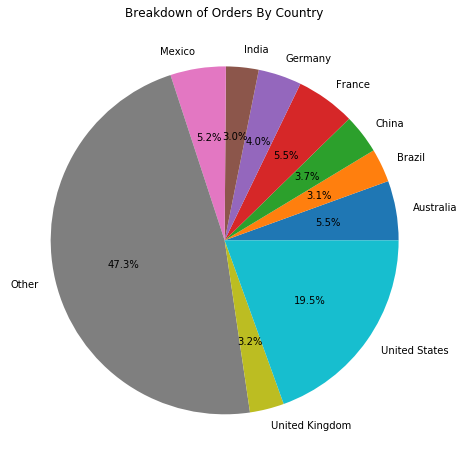

In [222]:
plt.figure(figsize=(16, 8))
plt.title("Breakdown of Orders By Country")
plt.pie(country_DF.Country, labels=country_DF.order_country, autopct='%1.1f%%')
plt.show()

In [223]:
Mproject.columns

Index(['Category', 'City', 'Country', 'Customer ID', 'Customer Name', 'Market',
       'Order Date', 'Order ID', 'Order Priority', 'Product ID',
       'Product Name', 'Region', 'Row ID', 'Segment', 'Ship Date', 'Ship Mode',
       'State', 'Sub-Category', 'Discount', 'Number of Records', 'Profit',
       'Quantity', 'Sales', 'Shipping Cost', 'order_month', 'order_year'],
      dtype='object')

In [224]:
Market_DF = Mproject.Market.value_counts(normalize=True).reset_index()  #creation  od a new data frame for the market
Market_DF  

,index,Market
0,APAC,0.214506
1,LATAM,0.200702
2,EU,0.194970
3,US,0.194853
4,EMEA,0.098050
5,Africa,0.089433
6,Canada,0.007487


This is a visualazation of the Orders that were made by Market

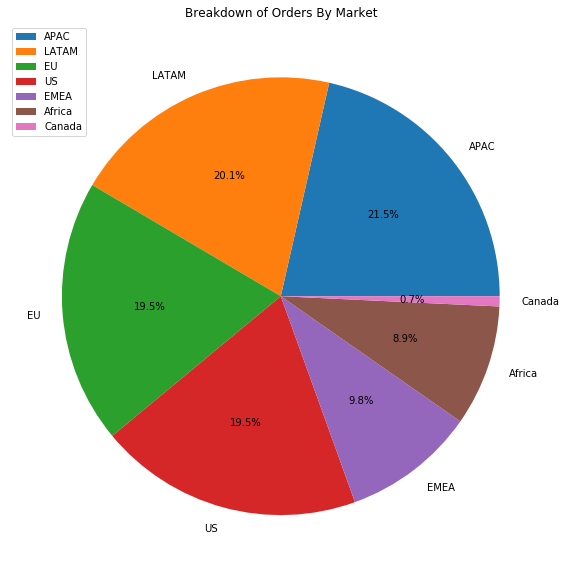

In [225]:
plt.figure(figsize=(15, 20))
plt.title("Breakdown of Orders By Market")
plt.pie(Market_DF.Market, labels=Market_DF["index"], autopct='%1.1f%%')
plt.legend()
plt.subplots_adjust(left=0, bottom=0.50, right=0.80)
plt.show()

In [226]:
#It was important to see when was the first order date of this data and the last.
min(Mproject['Order Date']), max(Mproject['Order Date'])

(Timestamp('2011-01-01 00:00:00'), Timestamp('2014-12-31 00:00:00'))

In [227]:
Mproject['Order Date'].agg(['min', 'max', 'nunique'])

min        2011-01-01 00:00:00
max        2014-12-31 00:00:00
nunique                   1430
Name: Order Date, dtype: object

In [228]:
#This breakdown is depicting the the profit that was made by yearand month of order
Mproject['order_month'] = Mproject['Order Date'].dt.month
Mproject['order_year'] = Mproject['Order Date'].dt.year
Mproject.loc[:,['Profit','order_month','order_year']].head()

,Profit,order_month,order_year
0,29.640,1,2011
1,-26.055,1,2011
2,106.140,1,2011
3,37.770,1,2011
4,15.342,1,2011


In [278]:
Profit_M_DF = Mproject.groupby(['order_month','order_year']).Profit.sum().reset_index()
Profit_M_DF.head(2)

,order_month,order_year,Profit
0,1,2011,13457.23302
1,1,2012,19627.42058


In [279]:
#profit by year and month
Profit_M_DF = Profit_M_DF.pivot(index='order_month', columns='order_year', values='Profit').reset_index() 
Profit_M_DF.head()

order_year,order_month,2011,2012,2013,2014
0,1,13457.23302,19627.42058,26052.40252,31447.74660
1,2,17588.83726,17828.18244,31553.99756,29454.01876
2,3,16169.36062,22752.87684,34873.71938,50097.04458
3,4,13405.46924,20804.00532,26008.05144,35709.53320
4,5,14777.45792,22865.39572,39053.30946,34335.60404


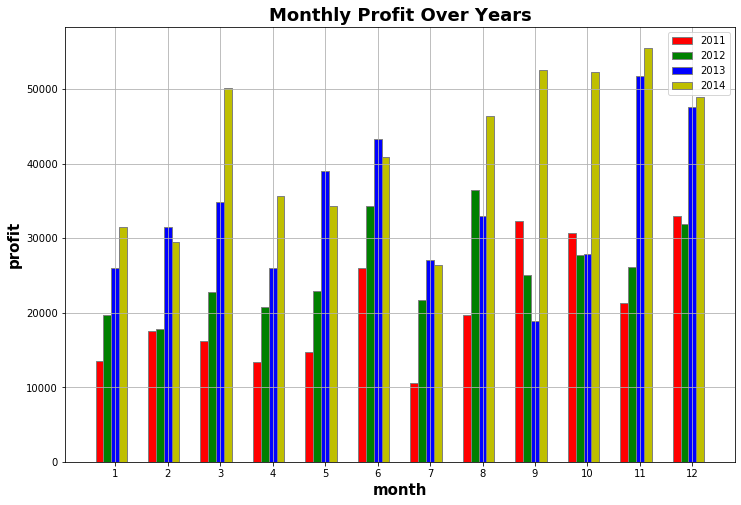

In [231]:

# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# Make the plot
plt.bar(Profit_M_DF.order_month * 2 - 0.6, Profit_M_DF[2011], color ='r', width = barWidth,
        edgecolor ='grey', label ='2011')
plt.bar(Profit_M_DF.order_month * 2 - 0.3,  Profit_M_DF[2012], color ='g', width = barWidth,
        edgecolor ='grey', label ='2012')
plt.bar(Profit_M_DF.order_month * 2,  Profit_M_DF[2013], color ='b', width = barWidth,
        edgecolor ='grey', label ='2013')
plt.bar(Profit_M_DF.order_month * 2 + 0.3,  Profit_M_DF[2014], color ='y', width = barWidth,
        edgecolor ='grey', label ='2014')
 
# Adding Xticks
plt.xlabel('month', fontweight ='bold', fontsize = 15)
plt.ylabel('profit', fontweight ='bold', fontsize = 15)
plt.xticks(range(2, 26, 2), range(1, 13))
plt.legend()
plt.grid()
plt.title('Monthly Profit Over Years', fontweight ='bold', fontsize = 18)
plt.show()


In [232]:
category_DF = Mproject.groupby('Category').Quantity.sum().reset_index()
category_DF

,Category,Quantity
0,Furniture,34954
1,Office Supplies,108182
2,Technology,35176


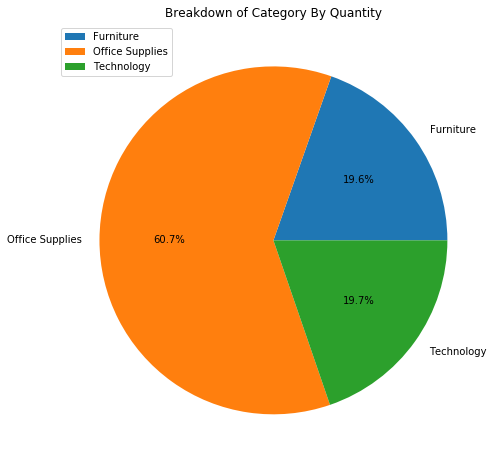

In [233]:
plt.figure(figsize=(16, 8))
plt.title("Breakdown of Category By Quantity")
plt.pie(category_DF.Quantity, labels=category_DF.Category, autopct='%1.1f%%')
plt.legend(loc="upper left")
plt.show() 



In [234]:
Client_DF = Mproject.groupby('Customer ID')["Order Date"].min().reset_index()

In [235]:
Client_DF.head(3)

,Customer ID,Order Date
0,AA-103151,2011-04-07
1,AA-103152,2012-05-16
2,AA-103153,2011-11-24


In [236]:

# add colum that is a week/month associated with the order date- to use it in the group by below
Client_DF=Client_DF.groupby('Order Date')['Customer ID'].count().reset_index()
Client_DF

,Order Date,Customer ID
0,2011-01-01,4
1,2011-01-02,10
2,2011-01-03,19
3,2011-01-04,9
4,2011-01-06,21
...,...,...
1075,2014-12-24,3
1076,2014-12-25,1
1077,2014-12-26,1
1078,2014-12-30,2


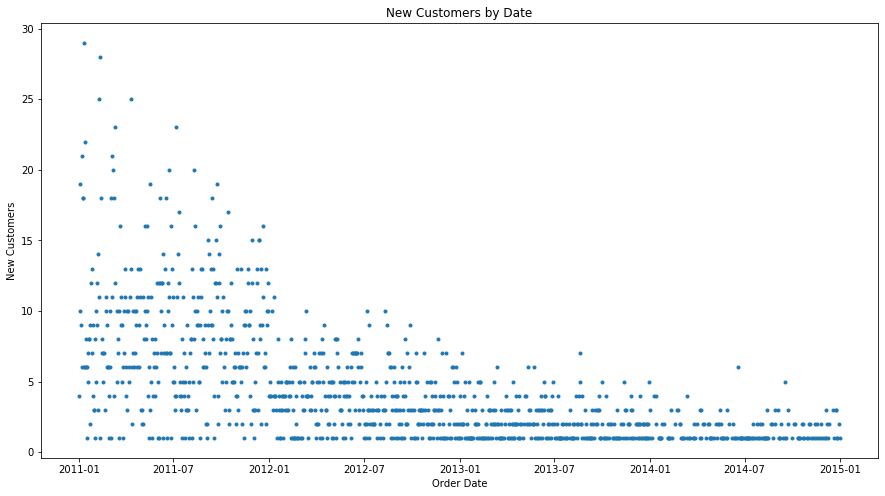

In [237]:
fig = plt.subplots(figsize =(15, 8))
plt.plot(Client_DF['Order Date'], Client_DF['Customer ID'], ".")
plt.title('New Customers by Date')
plt.xlabel('Order Date')
plt.ylabel('New Customers')
plt.show()

In [238]:
Client_DF2=Client_DF.groupby([Client_DF['Order Date'].dt.year,Client_DF['Order Date'].dt.month]).sum()
Client_DF2

Customer ID
Order Date Order Date             
2011       1                   287
           2                   227
           3                   283
           4                   232
           5                   218
           6                   284
           7                   191
           8                   247
           9                   273
           10                  203
           11                  211
           12                  234
2012       1                   102
           2                    91
           3                   115
           4                   106
           5                   115
           6                   128
           7                    82
           8                   111
           9                    98
           10                   74
           11                   82
           12                   68
2013       1                    63
           2                    49
           3                    51
           4                    55
           5                    53
           6                    61
           7                    29
           8                    52
           9                    39
           10                   31
           11                   39
           12                   44
2014       1                    21
           2                    20
           3                    18
           4                    21
           5                    22
           6                    21
           7                    19
           8                    23
           9                    22
           10                   16
           11                   17
           12                   25

Text(0, 0.5, 'New Customers')

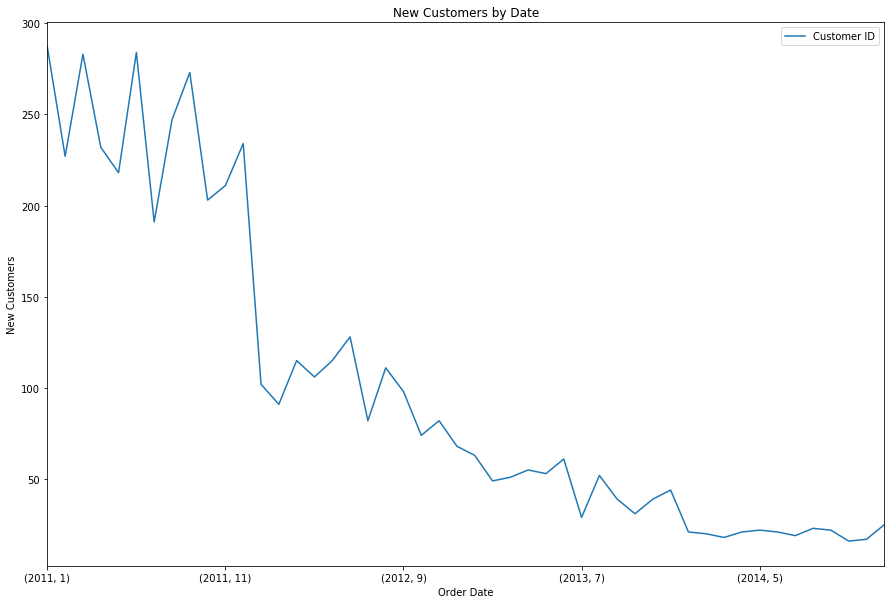

In [239]:
Client_DF2.plot(figsize=(15,10))
plt.title('New Customers by Date')
plt.xlabel('Order Date')
plt.ylabel('New Customers')

In [240]:
Client_DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1080 entries, 0 to 1079
Data columns (total 2 columns):
Order Date     1080 non-null datetime64[ns]
Customer ID    1080 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 17.0 KB


In [241]:
#making sure there are different customer ID for same name
ClientName_DF = Mproject.groupby('Customer Name')["Customer ID"].nunique().reset_index()
Mproject[Mproject["Customer Name"] == "Aaron Bergman"]



,Category,City,Country,Customer ID,Customer Name,Market,Order Date,Order ID,Order Priority,Product ID,...,State,Sub-Category,Discount,Number of Records,Profit,Quantity,Sales,Shipping Cost,order_month,order_year
693,Office Supplies,Arlington,United States,AB-100154,Aaron Bergman,US,2011-02-19,CA-2011-152905,Low,OFF-ST-10000321,...,Texas,Storage,0.20,1,-2.5248,2,13.0,0.970,2,2011
927,Furniture,Seattle,United States,AB-100154,Aaron Bergman,US,2011-07-03,CA-2011-156587,High,FUR-CH-10004477,...,Washington,Chairs,0.20,1,5.4801,1,49.0,11.130,7,2011
929,Office Supplies,Seattle,United States,AB-100154,Aaron Bergman,US,2011-07-03,CA-2011-156587,High,OFF-AR-10001427,...,Washington,Art,0.00,1,4.6644,3,18.0,4.290,7,2011
930,Office Supplies,Seattle,United States,AB-100154,Aaron Bergman,US,2011-07-03,CA-2011-156587,High,OFF-ST-10002344,...,Washington,Storage,0.00,1,4.8588,3,243.0,1.280,7,2011
1139,Office Supplies,Marsala,Italy,AB-100152,Aaron Bergman,EU,2011-03-21,ES-2011-3528133,Critical,OFF-LA-10001169,...,Sicily,Labels,0.00,1,6.9300,7,47.0,10.080,3,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40102,Office Supplies,Palembang,Indonesia,AB-100151,Aaron Bergman,APAC,2014-06-23,ID-2014-48583,Medium,OFF-SU-10004008,...,Sumatera Selatan,Supplies,0.47,1,2.8512,4,50.0,2.810,6,2014
43916,Office Supplies,Hubli,India,AB-100151,Aaron Bergman,APAC,2014-09-09,IN-2014-63710,Critical,OFF-BI-10004140,...,Karnataka,Binders,0.00,1,12.0000,4,27.0,6.550,9,2014
43917,Office Supplies,Hubli,India,AB-100151,Aaron Bergman,APAC,2014-09-09,IN-2014-63710,Critical,OFF-BI-10004666,...,Karnataka,Binders,0.00,1,22.6800,1,50.0,10.540,9,2014
50149,Furniture,Apopa,El Salvador,AB-100153,Aaron Bergman,LATAM,2014-12-15,MX-2014-127901,Medium,FUR-CH-10004669,...,San Salvador,Chairs,0.00,1,238.1200,2,611.0,57.833,12,2014


In [242]:
Profit_S_DF =Mproject.groupby(['Sub-Category']).Profit.sum().reset_index().sort_values(by='Profit' ,ascending = False)
Profit_S_DF

,Sub-Category,Profit
6,Copiers,258567.54818
13,Phones,216717.00580
4,Bookcases,161924.41950
1,Appliances,141680.58940
5,Chairs,140396.26750
0,Accessories,129626.30620
14,Storage,108461.48980
3,Binders,72449.84600
12,Paper,59207.68270
11,Machines,58867.87300


Text(0.5, 1.0, 'Sub category by Profit')

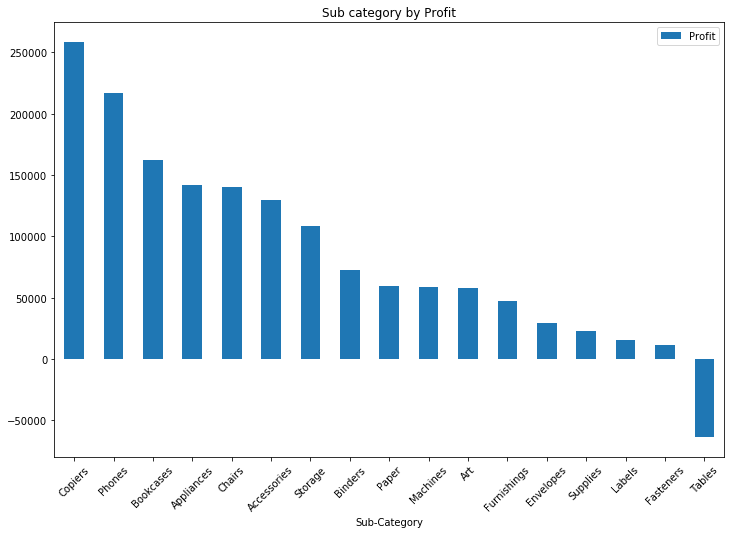

In [243]:
Profit_S_DF.plot.bar(x='Sub-Category', y='Profit', rot=45,figsize =(12, 8))
plt.title('Sub category by Profit')

In [244]:
Profit_D_DF =Mproject.groupby(['Order Date']).Profit.sum().reset_index()
Profit_D_DF['profitable'] = np.where(Profit_D_DF['Profit']> 0 , 'True', 'False')
Profit_D_DF['Year-Month'] = Profit_D_DF['Order Date'].dt.strftime('%Y-%m')
#Profit_D_DF['Month'] = Profit_D_DF['Order Date'].dt.month
Profit_D_DF

,Order Date,Profit,profitable,Year-Month
0,2011-01-01,198.87300,True,2011-01
1,2011-01-02,603.47360,True,2011-01
2,2011-01-03,1905.15390,True,2011-01
3,2011-01-04,-308.78740,False,2011-01
4,2011-01-06,2460.25360,True,2011-01
...,...,...,...,...
1425,2014-12-27,-916.64004,False,2014-12
1426,2014-12-28,81.06380,True,2014-12
1427,2014-12-29,2046.20678,True,2014-12
1428,2014-12-30,2554.00460,True,2014-12


In [245]:
Profit_D_DFg=Profit_D_DF.groupby(['Year-Month', 'profitable'])['Order Date'].count().reset_index()
Profit_D_DFg=Profit_D_DFg.pivot(columns='profitable', index='Year-Month', values='Order Date').reset_index()
Profit_D_DFg.head(3)

profitable,Year-Month,False,True
0,2011-01,8,22
1,2011-02,6,21
2,2011-03,6,22


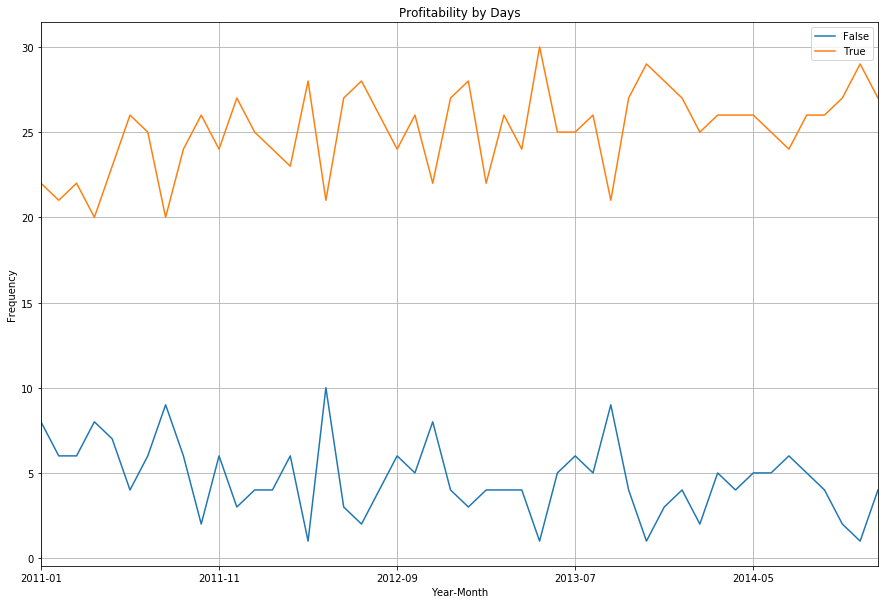

In [246]:
Profit_D_DFg.plot(x='Year-Month',y=['False','True'],figsize=(15,10))
plt.title('Profitability by Days')
plt.xlabel('Year-Month')
plt.ylabel('Frequency')
plt.legend()
plt.grid()
plt.show()

## question 3 

In [247]:
Base_DF = Mproject.groupby('Customer ID')["Order Date"].min().reset_index()

In [248]:
my_columns = ["Order Date", "Profit", "Sales"]


In [249]:
column_d = {
 "Order Date": ['count','min','max'],
  "Profit": ['sum','mean'],
  "Sales": ['sum','mean']
}


In [250]:
Client_DF_G = Mproject.loc[ Mproject["Order Date"].dt.year == 2014, :].groupby('Customer ID')[my_columns].agg(column_d).reset_index()
Client_DF_G.columns = Client_DF_G.columns.map('_'.join)
Client_DF_G.head()


,Customer ID_,Order Date_count,Order Date_min,Order Date_max,Profit_sum,Profit_mean,Sales_sum,Sales_mean
0,AA-103151,5,2014-07-01,2014-12-23,11.3475,2.2695,541.0,108.200000
1,AA-103152,10,2014-04-08,2014-12-18,426.3690,42.6369,2973.0,297.300000
2,AA-103154,2,2014-06-30,2014-06-30,96.5050,48.2525,375.0,187.500000
3,AA-103751,6,2014-10-07,2014-12-25,570.1800,95.0300,1520.0,253.333333
4,AA-103752,1,2014-02-17,2014-02-17,7.9200,7.9200,90.0,90.000000


In [251]:
Client_DF_G = Client_DF_G.merge(Base_DF, how="inner", left_on='Customer ID_', right_on='Customer ID')

In [252]:
Client_DF_G.head()

,Customer ID_,Order Date_count,Order Date_min,Order Date_max,Profit_sum,Profit_mean,Sales_sum,Sales_mean,Customer ID,Order Date
0,AA-103151,5,2014-07-01,2014-12-23,11.3475,2.2695,541.0,108.200000,AA-103151,2011-04-07
1,AA-103152,10,2014-04-08,2014-12-18,426.3690,42.6369,2973.0,297.300000,AA-103152,2012-05-16
2,AA-103154,2,2014-06-30,2014-06-30,96.5050,48.2525,375.0,187.500000,AA-103154,2011-03-31
3,AA-103751,6,2014-10-07,2014-12-25,570.1800,95.0300,1520.0,253.333333,AA-103751,2011-07-10
4,AA-103752,1,2014-02-17,2014-02-17,7.9200,7.9200,90.0,90.000000,AA-103752,2012-03-23


## adding columns

In [253]:
Client_DF_G['cohort'] = Client_DF_G['Order Date'].dt.strftime('%Y')
Client_DF_G.head(20)

,Customer ID_,Order Date_count,Order Date_min,Order Date_max,Profit_sum,Profit_mean,Sales_sum,Sales_mean,Customer ID,Order Date,cohort
0,AA-103151,5,2014-07-01,2014-12-23,11.3475,2.2695,541.0,108.200000,AA-103151,2011-04-07,2011
1,AA-103152,10,2014-04-08,2014-12-18,426.3690,42.6369,2973.0,297.300000,AA-103152,2012-05-16,2012
2,AA-103154,2,2014-06-30,2014-06-30,96.5050,48.2525,375.0,187.500000,AA-103154,2011-03-31,2011
3,AA-103751,6,2014-10-07,2014-12-25,570.1800,95.0300,1520.0,253.333333,AA-103751,2011-07-10,2011
4,AA-103752,1,2014-02-17,2014-02-17,7.9200,7.9200,90.0,90.000000,AA-103752,2012-03-23,2012
5,AA-103753,2,2014-08-27,2014-11-27,27.4960,13.7480,88.0,44.000000,AA-103753,2012-03-04,2012
6,AA-103754,5,2014-08-09,2014-12-12,68.9195,13.7839,207.0,41.400000,AA-103754,2011-04-21,2011
7,AA-104801,2,2014-03-17,2014-08-28,-7.1250,-3.5625,2673.0,1336.500000,AA-104801,2011-06-24,2011
8,AA-104802,2,2014-05-16,2014-05-16,139.6800,69.8400,2633.0,1316.500000,AA-104802,2011-01-11,2011
9,AA-104803,5,2014-04-17,2014-09-05,277.3000,55.4600,2431.0,486.200000,AA-104803,2012-06-09,2012


In [254]:
my_columns = ["Order Date_count", "Profit_sum", "Sales_sum"]

column_d = {
 "Order Date_count": ['count','sum','mean', 'median'],
  "Profit_sum" : ['sum','mean', 'median'],
  "Sales_sum" : ['sum','mean']
}

cohort_DF = Client_DF_G.groupby('cohort')[my_columns].agg(column_d).reset_index()
cohort_DF.columns = cohort_DF.columns.map('_'.join)
cohort_DF.head()

,cohort_,Order Date_count_count,Order Date_count_sum,Order Date_count_mean,Order Date_count_median,Profit_sum_sum,Profit_sum_mean,Profit_sum_median,Sales_sum_sum,Sales_sum_mean
0,2011,2387,11074,4.639296,4,321953.76334,134.877991,64.344,2852929.0,1195.194386
1,2012,907,4015,4.426681,4,117599.06288,129.657181,57.388,931711.0,1027.244763
2,2013,409,1653,4.041565,3,43565.40262,106.516877,38.280,375048.0,916.987775
3,2014,245,789,3.220408,2,21047.74162,85.909149,30.570,140353.0,572.869388


In [255]:
cohort_DF["Order Date_count_count"] / cohort_DF["Order Date_count_count"].sum()

0    0.604610
1    0.229737
2    0.103597
3    0.062057
Name: Order Date_count_count, dtype: float64

## question 4 -Create a Sales Forecast for the next 2 years

In [256]:
Sales_4 = Mproject.groupby(['Order Date']).Sales.sum().reset_index()
Sales_4['Year-Month'] = Sales_4['Order Date'].dt.strftime('%Y-%m')
Sales_4

,Order Date,Sales,Year-Month
0,2011-01-01,808.0,2011-01
1,2011-01-02,2457.0,2011-01
2,2011-01-03,12567.0,2011-01
3,2011-01-04,2586.0,2011-01
4,2011-01-06,11481.0,2011-01
...,...,...,...
1425,2014-12-27,13418.0,2014-12
1426,2014-12-28,1646.0,2014-12
1427,2014-12-29,25106.0,2014-12
1428,2014-12-30,16833.0,2014-12


In [257]:
Sales_forcast=Sales_4.groupby(['Year-Month']).Sales.sum().reset_index()
Sales_forcast

,Year-Month,Sales
0,2011-01,138245.0
1,2011-02,134969.0
2,2011-03,171445.0
3,2011-04,128843.0
4,2011-05,148158.0
5,2011-06,189339.0
6,2011-07,162039.0
7,2011-08,219236.0
8,2011-09,255250.0
9,2011-10,204679.0


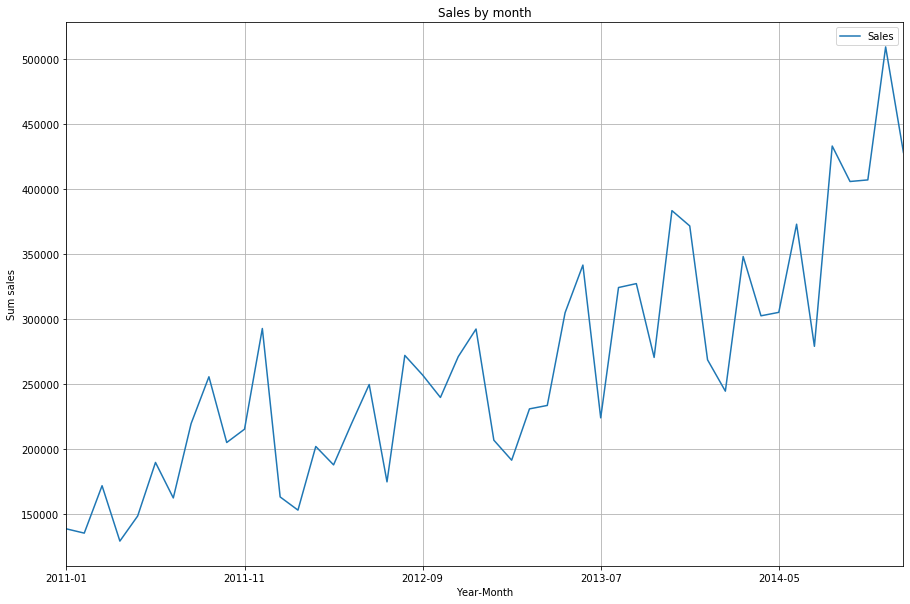

In [258]:
Sales_forcast.plot(x='Year-Month',y=['Sales'],figsize=(15,10))
plt.title('Sales by month')
plt.xlabel('Year-Month')
plt.ylabel('Sum sales')
plt.legend()
plt.grid()
plt.show()

In [259]:
Sales_Y = Mproject.groupby(Mproject['Order Date'].dt.year).Sales.sum().reset_index()
Sales_Y

,Order Date,Sales
0,2011,2259511.0
1,2012,2677493.0
2,2013,3405860.0
3,2014,4300041.0


In [260]:
Sales_Y['p_year'] = Sales_Y.Sales.shift(1).fillna(2259511.0)
Sales_Y['change_year'] = Sales_Y.Sales - Sales_Y.p_year
Sales_Y['change_t'] = Sales_Y['change_year'] / Sales_Y.p_year
Sales_Y.head()

,Order Date,Sales,p_year,change_year,change_t
0,2011,2259511.0,2259511.0,0.0,0.000000
1,2012,2677493.0,2259511.0,417982.0,0.184988
2,2013,3405860.0,2677493.0,728367.0,0.272033
3,2014,4300041.0,3405860.0,894181.0,0.262542


## Question 4- the increase is between 19%~ - 27%~ therfore I calculated it by multipling in 26%

In [261]:
4300041.0*1.26

5418051.66

In [262]:
5418051.66*1.26

6826745.0916

## Which are the Top 5 countries that have shown the best Sales -CAGR

In [263]:
Sales_CAGR = Mproject.groupby([Mproject['Order Date'].dt.year, "Country" ]).Sales.sum().reset_index()
Sales_CAGR

,Order Date,Country,Sales
0,2011,Afghanistan,1728.0
1,2011,Albania,1707.0
2,2011,Algeria,8538.0
3,2011,Angola,6416.0
4,2011,Argentina,8737.0
...,...,...,...
532,2014,Venezuela,10060.0
533,2014,Vietnam,19247.0
534,2014,Yemen,448.0
535,2014,Zambia,5396.0


In [264]:
Sales_CAGR[Sales_CAGR[ "Country"] == "Argentina"]

,Order Date,Country,Sales
4,2011,Argentina,8737.0
137,2012,Argentina,7035.0
266,2013,Argentina,17955.0
403,2014,Argentina,23783.0


In [265]:
(23783/8737)**(1/4)-1

0.28447623958769896

In [266]:
Country_firstLast_Sale = Sales_CAGR.groupby(Sales_CAGR["Country"])[["Order Date"]].agg(["max","min"]).reset_index()
Country_firstLast_Sale.columns = Country_firstLast_Sale.columns.map("_".join)
Country_firstLast_Sale

,Country_,Order Date_max,Order Date_min
0,Afghanistan,2014,2011
1,Albania,2014,2011
2,Algeria,2014,2011
3,Angola,2014,2011
4,Argentina,2014,2011
...,...,...,...
142,Venezuela,2014,2011
143,Vietnam,2014,2011
144,Yemen,2014,2011
145,Zambia,2014,2011


In [267]:
Order_Date_max = Country_firstLast_Sale.merge(Sales_CAGR, how='inner', on=None, left_on=["Country_","Order Date_max"],
                             right_on=["Country","Order Date"])

In [268]:
Order_Date_max = Order_Date_max.merge(Sales_CAGR, how='inner', on=None, left_on=["Country_","Order Date_min"],
                             right_on=["Country","Order Date"], suffixes=('Max', 'Min'))

In [269]:
Order_Date_max['Order Date_min'].value_counts()

2011    133
2012      8
2013      5
2014      1
Name: Order Date_min, dtype: int64

In [270]:
Order_Date_max['NumY'] = Order_Date_max['Order Date_max'] - Order_Date_max['Order Date_min'] +1

In [271]:
Order_Date_max

,Country_,Order Date_max,Order Date_min,Order DateMax,CountryMax,SalesMax,Order DateMin,CountryMin,SalesMin,NumY
0,Afghanistan,2014,2011,2014,Afghanistan,6630.0,2011,Afghanistan,1728.0,4
1,Albania,2014,2011,2014,Albania,412.0,2011,Albania,1707.0,4
2,Algeria,2014,2011,2014,Algeria,12784.0,2011,Algeria,8538.0,4
3,Angola,2014,2011,2014,Angola,8044.0,2011,Angola,6416.0,4
4,Argentina,2014,2011,2014,Argentina,23783.0,2011,Argentina,8737.0,4
...,...,...,...,...,...,...,...,...,...,...
142,Venezuela,2014,2011,2014,Venezuela,10060.0,2011,Venezuela,7058.0,4
143,Vietnam,2014,2011,2014,Vietnam,19247.0,2011,Vietnam,12856.0,4
144,Yemen,2014,2011,2014,Yemen,448.0,2011,Yemen,39.0,4
145,Zambia,2014,2011,2014,Zambia,5396.0,2011,Zambia,4355.0,4


In [272]:
Order_Date_max['CAGR'] = (Order_Date_max['SalesMax'] / Order_Date_max['SalesMin'])** (1/Order_Date_max['NumY']) -1

In [273]:
Order_Date_max.sort_values('CAGR',ascending=False )

,Country_,Order Date_max,Order Date_min,Order DateMax,CountryMax,SalesMax,Order DateMin,CountryMin,SalesMin,NumY,CAGR
80,Mauritania,2014,2012,2014,Mauritania,2491.0,2012,Mauritania,17.0,3,4.271994
140,Uruguay,2014,2011,2014,Uruguay,8223.0,2011,Uruguay,61.0,4,2.407416
29,Croatia,2014,2011,2014,Croatia,2379.0,2011,Croatia,25.0,4,2.123299
127,Tajikistan,2014,2011,2014,Tajikistan,239.0,2011,Tajikistan,3.0,4,1.987577
114,Slovenia,2014,2013,2014,Slovenia,1316.0,2013,Slovenia,153.0,2,1.932799
...,...,...,...,...,...,...,...,...,...,...,...
105,Republic of the Congo,2014,2011,2014,Republic of the Congo,374.0,2011,Republic of the Congo,2340.0,4,-0.367713
113,Slovakia,2014,2011,2014,Slovakia,106.0,2011,Slovakia,700.0,4,-0.376191
41,Estonia,2014,2011,2014,Estonia,205.0,2011,Estonia,1997.0,4,-0.433964
5,Armenia,2013,2011,2013,Armenia,20.0,2011,Armenia,136.0,3,-0.472166
